In [23]:
import pysmile
import pysmile_license
import numpy as np
import pandas as pd

from df_plot import plot_df 
from info_value_to_net import info_value_to_net
from get_info_values import mutual_info_measures, cond_kl_divergence
from save_info_values import save_info_values
from plots import plot_cond_mut_info, plot_relative_cond_mut_info, plot_cond_mut_info_bounds

np.seterr(divide='ignore', invalid = 'ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

## Using information-related metrics as value functions for a medical test:
Let $X, T, Y$ be random variables describing the results of screening, the results of the colonoscopy and the presence of CRC, respectively; and Z and C decision variables representing the first decision of screening and the decision of colonoscopy. A value function that we could use would be $$V(X,T,Y | Z=z, C=c) = I(X,Y | Z = z) + I(T,Y | C = c)$$ which measures the mutual information of $X$ and $Y$ and the correspondent to $T$ and $Y$. This quantity represents the amount of uncertainty of $Y$ that could be explained by the other variable. 

Check if adding this quantities is correct or if I have to reformulate the value function. 

In [24]:
# Read the network
net = pysmile.Network()
net.read_file("genie_models/Basic_ID_screening_current_inference_read.xdsl")

### **Pointwise conditional mutual information**

Mutual Information between two events conditioned on another, aka, **pointwise conditional mutual information**: $$ \log \frac{p(x,y|z)}{p(x|z)p(y|z)} $$

In [25]:
value_function = "rel_pcmi"

if value_function == "pcmi":

    df_value_scr, df_value_col = save_info_values(net, value_function = value_function, weighted=False)
    net = info_value_to_net(df_value_scr, df_value_col, net)

    wtp = 600000
    expression = f'1*COST+350*VALUE*Value_of_comfort'
    net.set_mau_expressions(node_id = "V", expressions = [expression])

    net.write_file(f"genie_models/Basic_ID_screening_current_inference_{value_function}.xdsl")


elif value_function == "rel_pcmi":

    df_value_scr, df_value_col = save_info_values(net, value_function = value_function, weighted=False)
    net = info_value_to_net(df_value_scr, df_value_col, net)

    wtp = 2500
    expression = f'1*COST+350*VALUE*Value_of_comfort'
    net.set_mau_expressions(node_id = "V", expressions = [expression])

    net.add_arc("Results_of_Screening", "Colonoscopy")

    net.write_file(f"genie_models/Basic_ID_screening_current_inference_{value_function}.xdsl")

    


In [26]:
df_value_scr

Age                        age_2_young                                 \
Alcohol                           high                                  
Diabetes                         False                                  
Hyperchol_                       False                                  
Hypertension                     False                                  
Sex                                  M                                  
Smoking                sm_1_not_smoker                                  
CRC                              False                                  
Screening                 No_screening                                  
Results_of_Screening No_pred_screening Predicted_False Predicted_True   
Value                              0.0             0.0            0.0   

Age                                                                    \
Alcohol                                                                 
Diabetes                                                                
Hyperchol_                                                              
Hypertension                                                            
Sex                                                                     
Smoking                                                                 
CRC                                                                     
Screening                        gFOBT                                  
Results_of_Screening No_pred_screening Predicted_False Predicted_True   
Value                              0.0        0.043916       -1.94979   

Age                                                                    \
Alcohol                                                                 
Diabetes                                                                
Hyperchol_                                                              
Hypertension                                                            
Sex                                                                     
Smoking                                                                 
CRC                                                                     
Screening                          FIT                                  
Results_of_Screening No_pred_screening Predicted_False Predicted_True   
Value                              0.0        0.074381      -2.110359   

Age                                     ... age_5_old_adult                    \
Alcohol                                 ...             low                     
Diabetes                                ...            True                     
Hyperchol_                              ...            True                     
Hypertension                            ...            True                     
Sex                                     ...               W                     
Smoking                                 ...  sm_3_ex_smoker                     
CRC                                     ...            True                     
Screening                  Blood_based  ...     Blood_based         Stool_DNA   
Results_of_Screening No_pred_screening  ...  Predicted_True No_pred_screening   
Value                              0.0  ...      524.209222               0.0   

Age                                                                    \
Alcohol                                                                 
Diabetes                                                                
Hyperchol_                                                              
Hypertension                                                            
Sex                                                                     
Smoking                                                                 
CRC                                                                     
Screening                                                         CTC   
Results_of_Screening Predicted_False Pr

In [27]:
# Locate the minimum value in the dataframe
min_value = df_value_scr.min().min()
min_value

-36566201.39525975

In [28]:
df_value_col

Age                        age_2_young                                   \
Alcohol                           high                                    
Diabetes                         False                                    
Hyperchol_                       False                                    
Hypertension                     False                                    
Sex                                  M                                    
Smoking                sm_1_not_smoker                                    
CRC                              False                                    
Colonoscopy             No_Colonoscopy                                    
Results_of_Colonoscopy         no_pred colon_pred_false colon_pred_true   
Value                              0.0              0.0             0.0   

Age                                                                  \
Alcohol                                                               
Diabetes                                                              
Hyperchol_                                                            
Hypertension                                                          
Sex                                                                   
Smoking                                                               
CRC                                                                   
Colonoscopy            Colonoscopy                                    
Results_of_Colonoscopy     no_pred colon_pred_false colon_pred_true   
Value                          0.0         0.097313       -9.574752   

Age                                                                     \
Alcohol                                                                  
Diabetes                                                                 
Hyperchol_                                                               
Hypertension                                                             
Sex                                                                      
Smoking                                                                  
CRC                              True                                    
Colonoscopy            No_Colonoscopy                                    
Results_of_Colonoscopy        no_pred colon_pred_false colon_pred_true   
Value                             0.0              0.0             0.0   

Age                                 ... age_5_old_adult              \
Alcohol                             ...             low               
Diabetes                            ...            True               
Hyperchol_                          ...            True               
Hypertension                        ...            True               
Sex                                 ...               W               
Smoking                             ...  sm_3_ex_smoker               
CRC                                 ...           False               
Colonoscopy            Colonoscopy  ...  No_Colonoscopy Colonoscopy   
Results_of_Colonoscopy     no_pred  ... colon_pred_true     no_pred   
Value                          0.0  ...             0.0         0.0   

Age                                                                     \
Alcohol                                                                  
Diabetes                                                                 
Hyperchol_                                                               
Hypertension                                                             
Sex                                                                      
Smoking                                                                  
CRC                                                               True   
Colonoscopy                                             No_Colonoscopy   
Results_of_Colonoscopy colon_pred_false colon_pred_true        no_pred   
Value                           0.11095      -10.758998

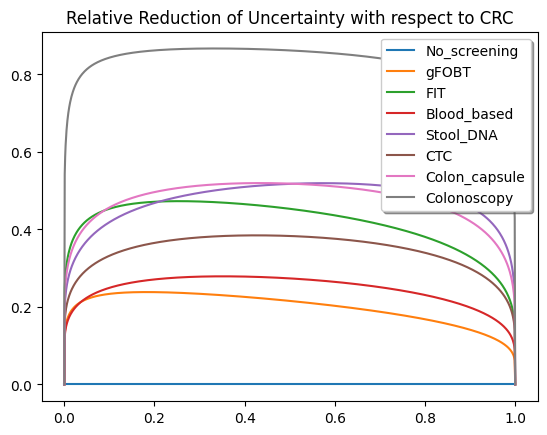

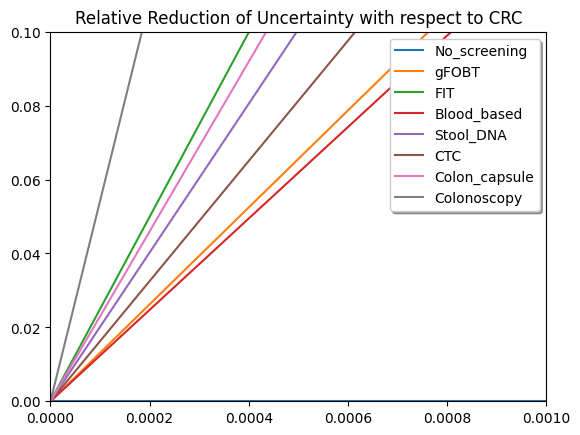

In [29]:
plot_relative_cond_mut_info(net)

#### Elicitation 

In [30]:
# Read the network
net_inf = pysmile.Network()
net_inf.read_file("genie_models/Basic_ID_screening_current_inference_rel_pcmi.xdsl")

In [31]:
scr_value_array = np.array(net.get_node_definition("Value_of_CRC_detection_by_screening"))

In [32]:
len(scr_value_array)

16128

In [33]:
np.argmin(scr_value_array)

2092

In [34]:
net_inf.update_beliefs()

In [35]:
v = np.array(net_inf.get_node_value("V"))
v

array([-2.60770344e-006, -8.80578813e+002,  4.45014772e-308, ...,
       -1.98681414e+003,  1.36661562e+002, -4.09939980e+002])

In [36]:
len(v)

16128

In [37]:
U = np.array(net_inf.get_node_value("U"))

len(U)

16128

In [38]:
U

array([-2.60770339e-009, -1.41229557e+000,  4.45014772e-308, ...,
       -6.29226456e+000,  1.27734616e-001, -5.06727348e-001])

#### **Elicitation**

In [68]:
# Read the network
net_inf = pysmile.Network()
net_inf.read_file("genie_models/Basic_ID_screening_current_inference_rel_pcmi.xdsl")

In [78]:
# For gFOBT

sens = 0.45
spec = 0.978

new_sens = 0.72
new_spec = 0.978

res_of_scr = net_inf.get_node_definition("Results_of_Screening")

idx_sens = net.get_node_definition("Results_of_Screening").index(sens)
idx_sens2 = net.get_node_definition("Results_of_Screening").index(1-sens) 

idx_spec = net.get_node_definition("Results_of_Screening").index(spec)
idx_spec2 = net.get_node_definition("Results_of_Screening").index(1-spec)

res_of_scr[idx_sens] = new_sens
res_of_scr[idx_sens2] = 1-new_sens

res_of_scr[idx_spec] = new_spec
res_of_scr[idx_spec2] = 1-new_spec

net_inf.set_node_definition("Results_of_Screening", res_of_scr)

In [79]:
arr = plot_cond_mut_info(net_inf, plot=False)

In [80]:
arr_gfobt = arr[1]
arr_fit = arr[2]

In [81]:
sum(arr_fit-arr_gfobt) / len(arr_gfobt)

0.0018708044410865189

In [82]:
alpha2 = (14.34 - 12.14) / ( sum(arr_fit-arr_gfobt) / len(arr_gfobt) )
alpha2

1175.9647089154287

In [45]:
# Read the network
net_inf = pysmile.Network()
net_inf.read_file("genie_models/Basic_ID_screening_current_inference_rel_pcmi.xdsl")

In [46]:
# For CTC
sens = 0.87
spec = 0.92

new_sens = 0.9
new_spec = 0.93

res_of_scr = net_inf.get_node_definition("Results_of_Screening")

idx_sens = net.get_node_definition("Results_of_Screening").index(sens)
idx_sens2 = net.get_node_definition("Results_of_Screening").index(1-sens)

idx_spec = net.get_node_definition("Results_of_Screening").index(spec)
idx_spec2 = net.get_node_definition("Results_of_Screening").index(1-spec)

res_of_scr[idx_sens] = new_sens
res_of_scr[idx_sens2] = 1-new_sens

res_of_scr[idx_spec] = new_spec
res_of_scr[idx_spec2] = 1-new_spec

net_inf.set_node_definition("Results_of_Screening", res_of_scr)

In [47]:
arr = plot_cond_mut_info(net_inf, plot=False)

In [48]:
arr_ctc = arr[5]
arr_cc = arr[6]

In [51]:
sum(arr_cc-arr_ctc) / len(arr_cc)

0.09713040547179141

In [52]:
alpha_3 = (510.24 - 95.41) / ( sum(arr_cc-arr_ctc) / len(arr_cc) )
alpha_3

4270.856257472073

#### Upper and lower bounds

In [ ]:
import numpy as np

lower_bound_array = np.empty((3, 14))

# Assign values to the array
lower_bound_array[0, :7] = [1, 0, 0, 0, 0, 0, 0]  # Probability of test knowing CRC is false
lower_bound_array[1, :7] = [0,	0.95,	0.93,	0.9,	0.85,	0.87,	0.9]  # Probability of test knowing CRC is false (predicted false)
lower_bound_array[2, :7] = [0,	0.05,	0.07,	0.1,	0.15,	0.13,	0.1]  # Probability of test knowing CRC is false (predicted true)

lower_bound_array[0, 7:] = [1,	0,	0,	0,	0,	0,	0]  # Probability of test knowing CRC is true
lower_bound_array[1, 7:] = [0,	0.6,	0.45,	0.3,	0.1,	0.25,	0.17]  # Probability of test knowing CRC is true (predicted false)
lower_bound_array[2, 7:] = [0,	0.40,	0.55,	0.6,	0.9,	0.75,	0.83]  # Probability of test knowing CRC is true (predicted true)

# Print the array
print(lower_bound_array.transpose().flatten())

[1.   0.   0.   0.   0.95 0.05 0.   0.93 0.07 0.   0.9  0.1  0.   0.85
 0.15 0.   0.87 0.13 0.   0.9  0.1  1.   0.   0.   0.   0.6  0.4  0.
 0.45 0.55 0.   0.3  0.6  0.   0.1  0.9  0.   0.25 0.75 0.   0.17 0.83]


In [ ]:
net1 = net
net1.set_node_definition("Results_of_Screening", lower_bound_array.transpose().flatten())

net1.write_file(f"genie_models/Basic_ID_screening_current_inference_lowerbound.xdsl")

net1 = pysmile.Network()
net1.read_file("genie_models/Basic_ID_screening_current_inference_lowerbound.xdsl")

# plot_cond_mut_info(net1)

In [ ]:
# Create an empty array with three rows and fourteen columns
upper_bound_array = np.empty((3, 14))

# Assign values to the array
upper_bound_array[0, :7] = [1, 0, 0, 0, 0, 0, 0]  # Probability of test knowing CRC is false
upper_bound_array[1, :7] = [0,	0.978,	0.966,	0.91,	0.866,	0.89,	0.92]  # Probability of test knowing CRC is false (predicted false)
upper_bound_array[2, :7] = [0,	0.022,	0.034,	0.09,	0.134,	0.11,	0.08]  # Probability of test knowing CRC is false (predicted true)

upper_bound_array[0, 7:] = [1,	0,	0,	0,	0,	0,	0]  # Probability of test knowing CRC is true
upper_bound_array[1, 7:] = [0,	0.55,	0.25,	0.34,	0.077,	0.2,	0.13]  # Probability of test knowing CRC is true (predicted false)
upper_bound_array[2, 7:] = [0,	0.45,	0.75,	0.66,	0.923,	0.8,	0.87]  # Probability of test knowing CRC is true (predicted true)

# Print the array
print(upper_bound_array.transpose().flatten())

[1.    0.    0.    0.    0.978 0.022 0.    0.966 0.034 0.    0.91  0.09
 0.    0.866 0.134 0.    0.89  0.11  0.    0.92  0.08  1.    0.    0.
 0.    0.55  0.45  0.    0.25  0.75  0.    0.34  0.66  0.    0.077 0.923
 0.    0.2   0.8   0.    0.13  0.87 ]


In [ ]:
net2 = net
net2.set_node_definition("Results_of_Screening", upper_bound_array.transpose().flatten())

net2.write_file(f"genie_models/Basic_ID_screening_current_inference_upperbound.xdsl")

net2 = pysmile.Network()
net2.read_file("genie_models/Basic_ID_screening_current_inference_upperbound.xdsl")

# plot_cond_mut_info(net2)

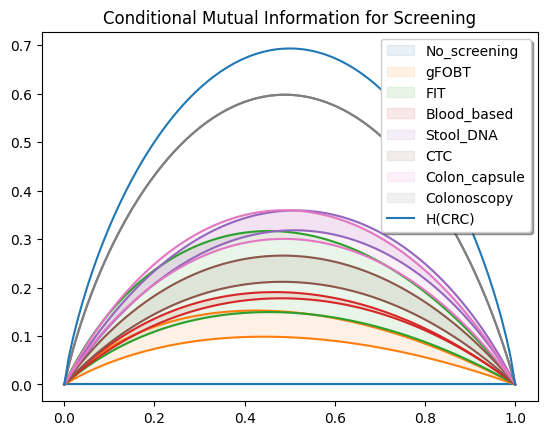

In [ ]:
plot_cond_mut_info_bounds(net1, net2)